## Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Data preperation 

In [2]:
df = pd.read_csv("temperatures.csv")

In [3]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [4]:
df.shape

(117, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     117 non-null    int64  
 1   JAN      117 non-null    float64
 2   FEB      117 non-null    float64
 3   MAR      117 non-null    float64
 4   APR      117 non-null    float64
 5   MAY      117 non-null    float64
 6   JUN      117 non-null    float64
 7   JUL      117 non-null    float64
 8   AUG      117 non-null    float64
 9   SEP      117 non-null    float64
 10  OCT      117 non-null    float64
 11  NOV      117 non-null    float64
 12  DEC      117 non-null    float64
 13  ANNUAL   117 non-null    float64
 14  JAN-FEB  117 non-null    float64
 15  MAR-MAY  117 non-null    float64
 16  JUN-SEP  117 non-null    float64
 17  OCT-DEC  117 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 16.6 KB


In [6]:
#checking if there is any null data over their
df.isnull().sum().sum()

0

## Enter the month you want to anaylze

In [7]:
month = input("Enter the month in Capitals(Max 3 words): ")

Enter the month in Capitals(Max 3 words): JAN


## Visualization 

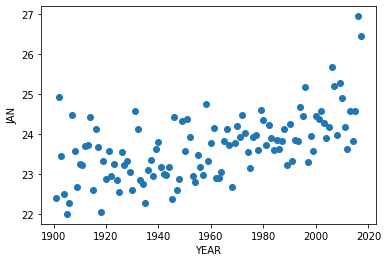

In [8]:
plt.scatter(df["YEAR"], df[month])
plt.xlabel("YEAR")
plt.ylabel(month)
plt.show()

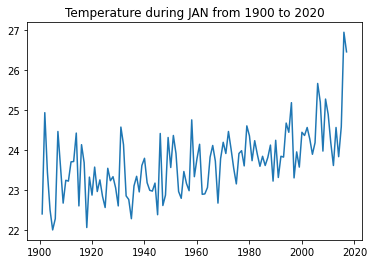

In [9]:
plt.plot(df["YEAR"], df[month])
plt.title("Temperature during %s from 1900 to 2020" %month)
plt.show()

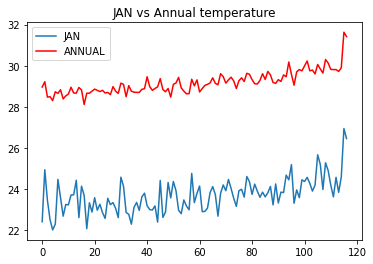

In [10]:
plt.plot(df[month], label=month)
plt.plot(df["ANNUAL"], color="red", label="ANNUAL")
plt.title("%s vs Annual temperature" %month)
plt.legend()
plt.show()

## Model creation 

In [11]:
# spliting the dataset and then creating model
X = df['YEAR'].values
Y = df[month]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [12]:
x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (93, 1)
Shape of x_test:  (24, 1)
Shape of y_train:  (93,)
Shape of y_test:  (24,)


In [13]:
model = LinearRegression()

In [14]:
model.fit(x_train, y_train)

LinearRegression()

In [15]:
print("Intercept: ", model.intercept_)
print("Coef: ", model.coef_)

Intercept:  -3.019933777084848
Coef:  [0.01360673]


In [16]:
y_pred = model.predict(x_test)

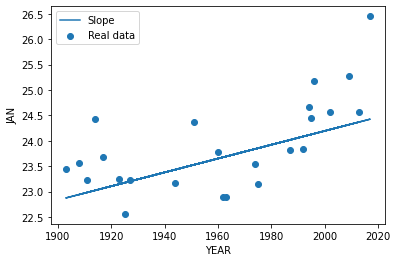

In [17]:
#checking the linear slope
plt.plot(x_test, y_pred, label="Slope")
plt.scatter(x_test, y_test, label="Real data")
plt.xlabel("YEAR")
plt.ylabel(month)
plt.legend()
plt.show()

In [18]:
model.predict(np.array(1960).reshape(-1, 1))

array([23.64926168])

### Error calculation

In [19]:
# Coefficient of determination also called as R2 score is used to evaluate the performance of 
# a linear regression model.

# The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares 
# i.e. the average squared difference between the estimated values and true value. Close to zero is better

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 score: ", round(r2, 4))
print("MSE score: ", round(mse, 4))

R2 score:  0.3241
MSE score:  0.5356


### Gradient descent

In [25]:
df = pd.read_csv("temperatures.csv")
X = df.iloc[:, 0]
Y = df.iloc[:, df.columns.get_loc(month)]

# building the model using gradient descent
m = 0
c = 0

L = 0.0001 # learning rate
epochs = 1000


n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    print(m, c, "\n")
    
print (m, c)

9.283967829059831 0.004737487179487178 

-7109.333291455594 -3.627984568564105 

5451193.9070796035 2781.8142621078305 

-4179782142.663482 -2132996.5101570454 

3204908703815.252 1635506073.5894349 

-2457410326466370.0 -1254048051182.4368 

1.8842550820354624e+18 961559568667951.8 

-1.4447799685459052e+21 -7.372897738847401e+17 

1.1078060382655894e+24 5.6532764936035566e+20 

-8.49426379888729e+26 -4.334731912086276e+23 

6.513100217259245e+29 3.3237186914383376e+26 

-4.9940142482529594e+32 -2.5485096111744727e+29 

3.829233004224914e+35 1.954106782556257e+32 

-2.936120057281551e+38 -1.4983397750941218e+35 

2.251312725357642e+41 1.1488737983357728e+38 

-1.7262267511124566e+44 -8.80915681771548e+40 

1.3236094491416736e+47 6.754549015872254e+43 

-1.0148967815080468e+50 -5.179148623631008e+46 

7.781868569942061e+52 3.9711874771546217e+49 

-5.966860822030501e+55 -3.044965712463641e+52 

4.5751772533145727e+58 2.33477171335223e+55 

-3.5080836512831363e+61 -1.79022014308964e+58 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

nan nan 

